In [235]:
import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
RANKS =      ('A',   '2',   '3',   '4',   '5',   '6',   '7',   '8',   '9',   'T',    'J',    'Q',    'K')
VALUES_MAP = {'A':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'T':10, 'J':10, 'Q':10, 'K':10}

In [237]:
#the deck is infinite
def get_card():
    return np.random.choice(RANKS)

In [238]:
HIT_ACTION  = 1
STAY_ACTION = 0

def init_hand(max_value=12):
    # we can use ace just one time
    usable_ace = True
    
    value = 0
    hand = list()
    
    while value < max_value:
        card = get_card()
        hand.append(card)
        
        if card == 'A' and usable_ace and value < 11:
            value += 11
            usable_ace = False
        else:
            value += VALUES_MAP[card]
            
    return hand, usable_ace, value

In [251]:
class State(object):
    def __init__(self, eps=0.05):
        self.values = np.array([0, 0])
        self.probs = np.array([0.5, 0.5])
        self.actions = np.array([0, 1])
        self.eps = 0.05
        
        self.returns = {0: list(), 1: list()}
        
    def get_action(self):
        return np.random.choice(self.actions, p = self.probs)

    def update_policy(self):
        best_action = np.argmax(self.values)
        worst_action = int(not best_action)
        
        self.probs[best_action], self.probs[worst_action] = self.eps, 1 - self.eps

In [252]:
def get_result(player, dealer):
    if dealer > 21:
        return 1
    elif dealer > player:
        return -1
    elif dealer == player:
        return 0
    elif dealer < player:
        return 1
            
def episode(states_map):       
    _, usable_ace, player_value = init_hand()
    dealer, _, dealer_value = init_hand(17)
    dealer = dealer[~0]
    
    history = list()
    
    # initial action
    curr_state = states_map[(player_value, usable_ace, dealer)]
    curr_action = curr_state.get_action()
    history.append((curr_state, curr_action))
    
    while player_value <= 21 and curr_action == HIT_ACTION: 
        card = get_card()
    
        if card == 'A' and usable_ace and player_value < 11:
            player_value += 11
            usable_ace = False
        else:
            player_value += VALUES_MAP[card]
        
        if player_value > 21:
            break
            
        curr_state = states_map[(player_value, usable_ace, dealer)]
        curr_action = curr_state.get_action()
        
        history.append((curr_state, curr_action))
            
    res = get_result(player_value, dealer_value)
    
    return history, res
    

In [262]:
states_map = {st:State(0.05) for st in itertools.product(np.arange(12, 22), [True, False], RANKS)}
max_iter = 50000

history_005 = list()
for it_num in range(max_iter):
    hist, result = episode(states_map)
    
    for st, act in hist:
        st.returns[act].append(result)
        st.values[act] = np.mean(st.returns[act])
        st.update_policy()

    history_005.append(result)

In [263]:
states_map = {st:State(0.1) for st in itertools.product(np.arange(12, 22), [True, False], RANKS)}
max_iter = 50000

history_01 = list()
for it_num in range(max_iter):
    hist, result = episode(states_map)
    
    for st, act in hist:
        st.returns[act].append(result)
        st.values[act] = np.mean(st.returns[act])
        st.update_policy()

    history_01.append(result)

In [264]:
states_map = {st:State(0.15) for st in itertools.product(np.arange(12, 22), [True, False], RANKS)}
max_iter = 50000

history_015 = list()
for it_num in range(max_iter):
    hist, result = episode(states_map)
    
    for st, act in hist:
        st.returns[act].append(result)
        st.values[act] = np.mean(st.returns[act])
        st.update_policy()

    history_015.append(result)

In [265]:
states_map = {st:State(0.2) for st in itertools.product(np.arange(12, 22), [True, False], RANKS)}
max_iter = 50000

history_02 = list()
for it_num in range(max_iter):
    hist, result = episode(states_map)
    
    for st, act in hist:
        st.returns[act].append(result)
        st.values[act] = np.mean(st.returns[act])
        st.update_policy()

    history_02.append(result)

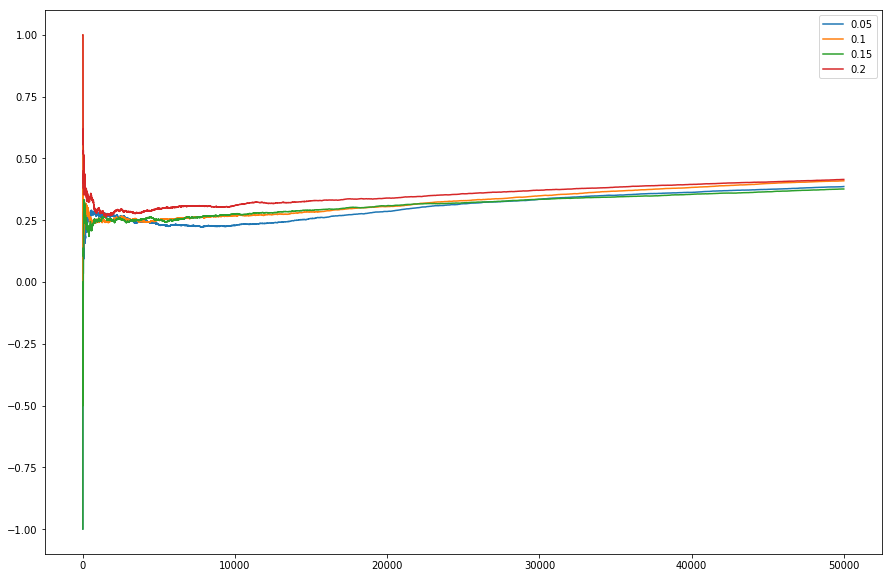

In [267]:
plt.figure(figsize=(15,10))
for h, e in zip([history_005, history_01, history_015, history_02], [0.05, 0.1, 0.15, 0.2]):
    game_nums = np.arange(1, len(h) + 1)
    winrate = np.cumsum(h)/game_nums
    
    plt.plot(game_nums, winrate, label=e)
    
plt.legend()
